# Загрузка Pandas и очистка данных

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()
%matplotlib inline

RANDOM_SEED = 42

In [278]:
df = pd.read_csv('main_task_new.csv')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [280]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [281]:
df.columns = ['id_rest', 'city', 'cuisine', 'ranking', 'rating',
       'price_range', 'reviews_count', 'reviews', 'url_ta', 'id_ta']

<AxesSubplot:>

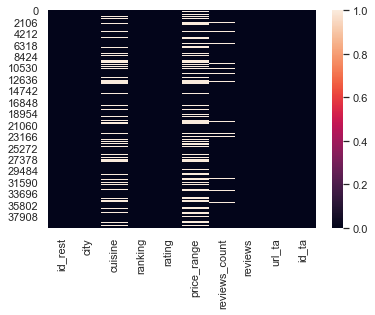

In [282]:
sns.heatmap(df.isna())

In [283]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки


## Reviews_number

In [284]:
df['missed_revievs_count'] = pd.isna(df.reviews_count).astype('uint8')
df.reviews_count.fillna(0, inplace=True)
#df['missed_reviews_count'] = df.reviews_count.apply(lambda x: 1 if x ==0 else 0)
df.query('reviews_count == 0').sample(5)

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,missed_revievs_count
2288,id_3031,Prague,"['European', 'Czech']",3038.0,4.0,NaN,0.0,"[[], []]",/Restaurant_Review-g274707-d4768775-Reviews-Re...,d4768775,1
13285,id_1541,Brussels,"['Italian', 'American', 'Pizza']",1593.0,5.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g1156375-d13200549-Reviews-...,d13200549,1
12668,id_2840,Lisbon,NaN,2843.0,4.0,NaN,0.0,"[[], []]",/Restaurant_Review-g189158-d8768713-Reviews-O_...,d8768713,1
13930,id_7395,Madrid,NaN,7401.0,3.0,NaN,0.0,"[[], []]",/Restaurant_Review-g187514-d5866674-Reviews-El...,d5866674,1
14813,id_1144,Stockholm,['Italian'],1145.0,5.0,NaN,0.0,"[['Fantastic Cuisine and Service'], ['04/21/20...",/Restaurant_Review-g189852-d6556194-Reviews-Ho...,d6556194,1


## Price range

In [285]:
df.price_range.value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

In [286]:
df.price_range.isna().value_counts()

False    26114
True     13886
Name: price_range, dtype: int64

In [287]:
# заменим категориальные признаки на ординальные. Пропуски пока заменим на 0
df.price_range = df.price_range.fillna(0)

def price_range_ord(cell):
    if type(cell) == str:
        cell = cell.replace('$$$$', '3')
        cell = cell.replace('$$ - $$$', '2')
        cell = cell.replace('$', '1')
        cell = int(cell)
    return cell

df.price_range = df.price_range.apply(price_range_ord)

df.price_range.value_counts()

2    18412
0    13886
1     6279
3     1423
Name: price_range, dtype: int64

In [288]:
df['missed_price_range'] = df.price_range.apply(lambda x: 1 if x == 0 else 0)
df.missed_price_range.value_counts()

0    26114
1    13886
Name: missed_price_range, dtype: int64

## City

In [289]:
df.city.value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: city, dtype: int64

In [290]:
df.city = df.city.replace('Oporto','Porto')

In [291]:
df[df.city == 'Porto']

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,missed_revievs_count,missed_price_range
5,id_1418,Porto,NaN,1419.0,3.0,0,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,0,1
157,id_770,Porto,"['Steakhouse', 'Southwestern', 'Barbecue', 'Gr...",771.0,5.0,1,3.0,"[['Best experience ever.'], ['02/09/2018']]",/Restaurant_Review-g189180-d13087286-Reviews-B...,d13087286,0,0
206,id_304,Porto,"['Seafood', 'Mediterranean', 'European', 'Port...",305.0,4.5,1,70.0,[['Great fishes and soups - tasty food for af....,/Restaurant_Review-g189180-d6946964-Reviews-Ta...,d6946964,0,0
222,id_1000,Porto,NaN,1001.0,4.5,0,5.0,"[['Pastries have never tasted so good!'], ['06...",/Restaurant_Review-g189180-d12336001-Reviews-C...,d12336001,0,1
227,id_342,Porto,"['American', 'Fast Food', 'Diner', 'Vegetarian...",343.0,4.5,2,72.0,"[['Tasty hamburger for a fast meal.', 'Too Man...",/Restaurant_Review-g189180-d9741389-Reviews-Bo...,d9741389,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39748,id_805,Porto,"['Steakhouse', 'European', 'Portuguese']",806.0,4.0,3,64.0,"[['Disappointing', 'Very Good Food'], ['01/15/...",/Restaurant_Review-g189180-d10042253-Reviews-T...,d10042253,0,0
39815,id_826,Porto,"['European', 'Portuguese']",827.0,4.0,2,23.0,"[['Nice restaurant!', 'Simple and good value']...",/Restaurant_Review-g189180-d12704188-Reviews-1...,d12704188,0,0
39873,id_430,Porto,"['European', 'Portuguese']",431.0,4.0,1,65.0,"[['yummy and huge francesinha', 'The best fran...",/Restaurant_Review-g189180-d10146257-Reviews-A...,d10146257,0,0
39895,id_871,Porto,"['Bar', 'European', 'Pub', 'Portuguese']",872.0,3.5,1,141.0,"[['Football on TV', 'Nice place for a glass of...",/Restaurant_Review-g189180-d7315906-Reviews-Cr...,d7315906,0,0


In [292]:
cities = pd.read_excel('cities.xlsx')
cities.head()

,city,lat,lon,population,country,is_capital
0,London,51.507351,-0.127758,9126366,United Kingdom,1
1,Paris,48.856613,2.352222,2175601,France,1
2,Madrid,40.416775,-3.703790,3348536,Spain,1
3,Barcelona,41.385063,2.173404,1620343,Spain,0
4,Berlin,52.520008,13.404954,3669495,Germany,1


In [293]:
cities_2 = pd.read_csv('uaScoresDataFrame.csv')
cities_2.head()

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [294]:
cities_2.rename(columns={'UA_Name':'city'}, inplace = True)

In [295]:
cities_2.drop(['Unnamed: 0', 'UA_Country', 'UA_Continent'], axis=1, inplace=True)

In [296]:
cities_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   266 non-null    object 
 1   Housing                266 non-null    float64
 2   Cost of Living         266 non-null    float64
 3   Startups               266 non-null    float64
 4   Venture Capital        266 non-null    float64
 5   Travel Connectivity    266 non-null    float64
 6   Commute                266 non-null    float64
 7   Business Freedom       266 non-null    float64
 8   Safety                 266 non-null    float64
 9   Healthcare             266 non-null    float64
 10  Education              266 non-null    float64
 11  Environmental Quality  266 non-null    float64
 12  Economy                266 non-null    float64
 13  Taxation               266 non-null    float64
 14  Internet Access        266 non-null    float64
 15  Leisur

In [297]:
def norm_latlons(row):
    row['norm_latlons'] = row['lat']**2 + row['lon']**2
    return row

In [298]:
#cities = cities.apply(norm_latlons, axis=1)

In [299]:
pd.merge(cities, cities_2, on = 'city', how='left')

,city,lat,lon,population,country,is_capital,Housing,Cost of Living,Startups,Venture Capital,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,London,51.507351,-0.127758,9126366,United Kingdom,1,1.0000,3.940,10.0000,9.859,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
1,Paris,48.856613,2.352222,2175601,France,1,3.5835,3.664,9.2765,7.513,...,6.2465,8.207667,7.0850,4.36225,4.2045,2.6480,9.7160,9.8165,5.5790,4.4330
2,Madrid,40.416775,-3.703790,3348536,Spain,1,6.4140,6.249,0.0000,4.790,...,7.7925,8.916333,4.2915,5.56550,4.2960,3.8940,6.2410,9.3380,7.6650,6.2200
3,Barcelona,41.385063,2.173404,1620343,Spain,0,6.3230,6.074,7.7585,5.655,...,7.4075,8.403333,5.0290,3.66550,4.2960,3.8940,6.4680,8.5915,7.4715,5.8280
4,Berlin,52.520008,13.404954,3669495,Germany,1,6.3950,5.524,9.0850,7.820,...,7.2515,7.990667,7.0190,6.77150,5.3735,3.9035,4.6780,8.8810,7.1775,5.4750
5,Milan,45.464203,9.189982,1404239,Italy,0,5.1945,4.801,5.1905,3.286,...,7.3780,8.444667,4.2830,4.45800,3.3625,2.4365,5.0140,7.9170,7.2195,5.6410
6,Rome,41.902782,12.496365,2856133,Italy,1,5.6025,5.323,4.6745,1.013,...,6.6045,7.863667,4.1570,4.27650,3.3625,2.4365,4.4910,9.1100,6.2215,6.3960
7,Prague,50.075539,14.437800,1324277,Czech Republic,1,7.4305,7.569,5.7795,2.302,...,8.6595,7.881000,4.2380,7.01425,4.3780,5.9335,6.0905,8.4645,8.1985,4.9010
8,Lisbon,38.722252,-9.139337,506654,Portugal,1,6.7340,7.004,6.0220,3.194,...,8.4380,7.860333,4.4800,6.41150,3.4830,4.1575,6.3940,7.8335,9.5970,5.6910
9,Vienna,48.208176,16.373819,1924158,Austria,1,6.3140,5.111,5.7980,3.635,...,8.5965,8.198000,4.8545,9.27000,4.6630,2.6660,6.1730,8.5215,8.9640,5.2945


In [300]:
cities.head()

,city,lat,lon,population,country,is_capital
0,London,51.507351,-0.127758,9126366,United Kingdom,1
1,Paris,48.856613,2.352222,2175601,France,1
2,Madrid,40.416775,-3.703790,3348536,Spain,1
3,Barcelona,41.385063,2.173404,1620343,Spain,0
4,Berlin,52.520008,13.404954,3669495,Germany,1


In [301]:
df = pd.merge(df, cities, how = 'left', on = 'city')
df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,missed_revievs_count,missed_price_range,lat,lon,population,country,is_capital
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,48.856613,2.352222,2175601,France,1
1,id_1535,Stockholm,NaN,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,59.329323,18.068581,974073,Sweden,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,51.507351,-0.127758,9126366,United Kingdom,1
3,id_3456,Berlin,NaN,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,1,52.520008,13.404954,3669495,Germany,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,48.135124,11.581981,1558395,Germany,0


In [302]:
rest_count = pd.DataFrame(df.city.value_counts()).reset_index()
rest_count.columns = ['city','rest_count_in_city']
rest_count

,city,rest_count_in_city
0,London,5757
1,Paris,4897
2,Madrid,3108
3,Barcelona,2734
4,Berlin,2155
5,Milan,2133
6,Rome,2078
7,Prague,1443
8,Lisbon,1300
9,Vienna,1166


In [303]:
df = pd.merge(df, rest_count, how = 'left', on = 'city')
df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,missed_revievs_count,missed_price_range,lat,lon,population,country,is_capital,rest_count_in_city
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,48.856613,2.352222,2175601,France,1,4897
1,id_1535,Stockholm,NaN,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,59.329323,18.068581,974073,Sweden,1,820
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,51.507351,-0.127758,9126366,United Kingdom,1,5757
3,id_3456,Berlin,NaN,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,1,52.520008,13.404954,3669495,Germany,1,2155
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,48.135124,11.581981,1558395,Germany,0,893


## Cuisine style

In [304]:
# Fill missing values in column with 'unknown'
df['cuisine'] = df['cuisine'].fillna("['unknown']")

In [305]:
# convert string in the column into a list
df['cuisine'] = df['cuisine'].apply(
    lambda x: eval(x))  # transform to a list

In [306]:
cuisines_with_freqs = pd.DataFrame(df.explode('cuisine').cuisine.str.strip().value_counts())
cuisines_with_freqs

,cuisine
Vegetarian Friendly,11189
European,10060
unknown,9283
Mediterranean,6277
Italian,5964
...,...
Salvadoran,1
Latvian,1
Xinjiang,1
Yunnan,1


In [307]:
def print_full(df):
    import pandas as pd
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

In [308]:
print_full(cuisines_with_freqs)

                     cuisine
Vegetarian Friendly    11189
European               10060
unknown                 9283
Mediterranean           6277
Italian                 5964
Vegan Options           4486
Gluten Free Options     4113
Bar                     3297
French                  3190
Asian                   3011
Pizza                   2849
Spanish                 2798
Pub                     2449
Cafe                    2325
Fast Food               1705
British                 1595
International           1584
Seafood                 1505
Japanese                1464
Central European        1393
American                1315
Sushi                   1156
Chinese                 1145
Portuguese              1107
Indian                  1041
Middle Eastern           782
Thai                     743
Wine Bar                 697
German                   662
Healthy                  620
Greek                    604
Halal                    598
Czech                    595
Fusion        

In [309]:
cuisines_types = pd.read_excel('cuisines.xlsx')
cuisines_types.head()

,cuisine,cuisine_type
0,Vegetarian Friendly,Healthy
1,European,European
2,unknown,unknown
3,Mediterranean,European
4,Italian,European


In [310]:
df['idx'] = df.index
df.tail()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,missed_revievs_count,missed_price_range,lat,lon,population,country,is_capital,rest_count_in_city,idx
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,45.464203,9.189982,1404239,Italy,0,2133,39995
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,48.856613,2.352222,2175601,France,1,4897,39996
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,1,59.329323,18.068581,974073,Sweden,1,820,39997
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,52.229675,21.012230,1793579,Poland,1,727,39998
39999,id_4824,Milan,[Spanish],4827.0,3.0,2,260.0,"[['Average', 'Nice an informal'], ['01/31/2016...",/Restaurant_Review-g187849-d1109020-Reviews-Ta...,d1109020,0,0,45.464203,9.189982,1404239,Italy,0,2133,39999


In [311]:
df_tmp = pd.merge(df.explode('cuisine')[['idx','cuisine']], cuisines_types, on='cuisine',how='left')
df_tmp = df_tmp.drop_duplicates(['idx','cuisine_type'])
df_tmp = df_tmp.groupby('idx').cuisine_type.apply(list).reset_index()
#df_tmp.join(pd.get_dummies(df_tmp['cuisine_type']))
df_tmp

,idx,cuisine_type
0,0,[European]
1,1,[unknown]
2,2,"[Asian, Specific, Healthy]"
3,3,[unknown]
4,4,"[European, Healthy]"
...,...,...
39995,39995,"[European, Healthy]"
39996,39996,"[European, American, Bar, Healthy]"
39997,39997,[Asian]
39998,39998,"[European, Midle_eastern, Healthy]"


In [312]:
from sklearn.preprocessing import MultiLabelBinarizer

In [313]:
s = df_tmp.cuisine_type
mlb = MultiLabelBinarizer()
pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df_tmp.index)

,African,American,Asian,Bar,European,Fast,Healthy,Midle_eastern,Specific,unknown
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,1,0,1,0,0,0
39996,0,1,0,1,1,0,1,0,0,0
39997,0,0,1,0,0,0,0,0,0,0
39998,0,0,0,0,1,0,1,1,0,0


In [314]:
df = pd.merge(df, df_tmp, on='idx', how='left')
df

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,missed_revievs_count,missed_price_range,lat,lon,population,country,is_capital,rest_count_in_city,idx,cuisine_type
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,48.856613,2.352222,2175601,France,1,4897,0,[European]
1,id_1535,Stockholm,[unknown],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,59.329323,18.068581,974073,Sweden,1,820,1,[unknown]
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,51.507351,-0.127758,9126366,United Kingdom,1,5757,2,"[Asian, Specific, Healthy]"
3,id_3456,Berlin,[unknown],3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,1,52.520008,13.404954,3669495,Germany,1,2155,3,[unknown]
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,48.135124,11.581981,1558395,Germany,0,893,4,"[European, Healthy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,45.464203,9.189982,1404239,Italy,0,2133,39995,"[European, Healthy]"
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,48.856613,2.352222,2175601,France,1,4897,39996,"[European, American, Bar, Healthy]"
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,1,59.329323,18.068581,974073,Sweden,1,820,39997,[Asian]
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,52.229675,21.012230,1793579,Poland,1,727,39998,"[European, Midle_eastern, Healthy]"


In [315]:
df['cuisine_count'] = df.cuisine.str.len()
df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,...,missed_price_range,lat,lon,population,country,is_capital,rest_count_in_city,idx,cuisine_type,cuisine_count
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,48.856613,2.352222,2175601,France,1,4897,0,[European],3
1,id_1535,Stockholm,[unknown],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,1,59.329323,18.068581,974073,Sweden,1,820,1,[unknown],1
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,51.507351,-0.127758,9126366,United Kingdom,1,5757,2,"[Asian, Specific, Healthy]",7
3,id_3456,Berlin,[unknown],3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,1,52.520008,13.404954,3669495,Germany,1,2155,3,[unknown],1
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,0,48.135124,11.581981,1558395,Germany,0,893,4,"[European, Healthy]",3


In [316]:
df['missed_cuisine']=df.cuisine.apply(lambda x: 1 if x == ['unknown'] else 0)
df.missed_cuisine.value_counts()

0    30717
1     9283
Name: missed_cuisine, dtype: int64

In [317]:
df.cuisine_count = (1-df.missed_cuisine)*df.cuisine_count
df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,...,lat,lon,population,country,is_capital,rest_count_in_city,idx,cuisine_type,cuisine_count,missed_cuisine
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,48.856613,2.352222,2175601,France,1,4897,0,[European],3,0
1,id_1535,Stockholm,[unknown],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,59.329323,18.068581,974073,Sweden,1,820,1,[unknown],0,1
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,51.507351,-0.127758,9126366,United Kingdom,1,5757,2,"[Asian, Specific, Healthy]",7,0
3,id_3456,Berlin,[unknown],3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,52.520008,13.404954,3669495,Germany,1,2155,3,[unknown],0,1
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,48.135124,11.581981,1558395,Germany,0,893,4,"[European, Healthy]",3,0


## Reviews

In [318]:
nan = None
df['rev_txt'] = df.reviews.apply(lambda x: eval(x)[0])
df['rev_date'] = df.reviews.apply(lambda x: eval(x)[1])
df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,...,population,country,is_capital,rest_count_in_city,idx,cuisine_type,cuisine_count,missed_cuisine,rev_txt,rev_date
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,2175601,France,1,4897,0,[European],3,0,"[Good food at your doorstep, A good hotel rest...","[12/31/2017, 11/20/2017]"
1,id_1535,Stockholm,[unknown],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,974073,Sweden,1,820,1,[unknown],0,1,"[Unique cuisine, Delicious Nepalese food]","[07/06/2017, 06/19/2016]"
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,9126366,United Kingdom,1,5757,2,"[Asian, Specific, Healthy]",7,0,"[Catch up with friends, Not exceptional]","[01/08/2018, 01/06/2018]"
3,id_3456,Berlin,[unknown],3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,3669495,Germany,1,2155,3,[unknown],0,1,[],[]
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,1558395,Germany,0,893,4,"[European, Healthy]",3,0,"[Best place to try a Bavarian food, Nice build...","[11/18/2017, 02/19/2017]"


In [319]:
def get_date(cell):
    if len(cell):
        cell = pd.to_datetime(cell, errors='coerce', format='%m/%d/%Y')
    return cell

In [320]:
df.rev_date = df.rev_date.apply(get_date)

In [321]:
def time_delta(cell):
    if len(cell)<2:
        return 0
    return np.abs((cell[0] - cell[1]).days)

In [322]:
df['rev_date_delta'] = df.rev_date.apply(time_delta)

df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,...,country,is_capital,rest_count_in_city,idx,cuisine_type,cuisine_count,missed_cuisine,rev_txt,rev_date,rev_date_delta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,France,1,4897,0,[European],3,0,"[Good food at your doorstep, A good hotel rest...","DatetimeIndex(['2017-12-31', '2017-11-20'], dt...",41
1,id_1535,Stockholm,[unknown],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,Sweden,1,820,1,[unknown],0,1,"[Unique cuisine, Delicious Nepalese food]","DatetimeIndex(['2017-07-06', '2016-06-19'], dt...",382
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,United Kingdom,1,5757,2,"[Asian, Specific, Healthy]",7,0,"[Catch up with friends, Not exceptional]","DatetimeIndex(['2018-01-08', '2018-01-06'], dt...",2
3,id_3456,Berlin,[unknown],3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,Germany,1,2155,3,[unknown],0,1,[],[],0
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,Germany,0,893,4,"[European, Healthy]",3,0,"[Best place to try a Bavarian food, Nice build...","DatetimeIndex(['2017-11-18', '2017-02-19'], dt...",272


In [323]:
df.rev_date_delta.value_counts()

0       11519
1         664
2         523
3         496
4         431
        ...  
780         1
812         1
2425        1
1356        1
1631        1
Name: rev_date_delta, Length: 1228, dtype: int64

In [324]:
df.rev_date_delta.max()

3207

In [325]:
df[df.rev_date_delta == df.rev_date_delta.max()].reviews.iloc[0]

"[['Incredible buffet!', 'Used to be great, but still good under new...'], ['10/02/2016', '12/22/2007']]"

<AxesSubplot:>

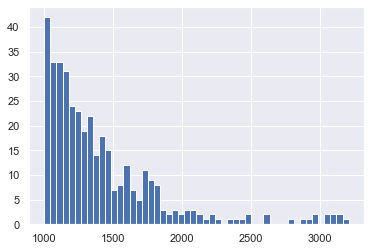

In [326]:
df[df.rev_date_delta>1000].rev_date_delta.hist(bins=50)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rev_date_delta'>

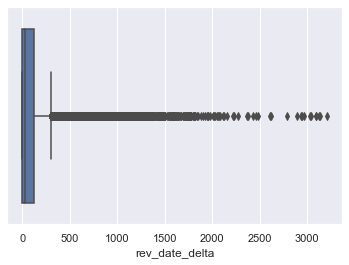

In [327]:
sns.boxplot(df.rev_date_delta)

In [328]:
def fresh_review(cell):
    if len(cell) == 0:
        return pd.to_datetime(0, unit='s')
    if len(cell) == 1:
        return cell[0]
    return cell.max()

In [329]:
df['fresh_rev'] = df.rev_date.apply(fresh_review)

In [330]:
df['fresh_rev_unx'] = df.fresh_rev.apply(lambda x: x.timestamp())

In [331]:
df.head()

,id_rest,city,cuisine,ranking,rating,price_range,reviews_count,reviews,url_ta,id_ta,...,rest_count_in_city,idx,cuisine_type,cuisine_count,missed_cuisine,rev_txt,rev_date,rev_date_delta,fresh_rev,fresh_rev_unx
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,4897,0,[European],3,0,"[Good food at your doorstep, A good hotel rest...","DatetimeIndex(['2017-12-31', '2017-11-20'], dt...",41,2017-12-31,1.514678e+09
1,id_1535,Stockholm,[unknown],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,820,1,[unknown],0,1,"[Unique cuisine, Delicious Nepalese food]","DatetimeIndex(['2017-07-06', '2016-06-19'], dt...",382,2017-07-06,1.499299e+09
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,5757,2,"[Asian, Specific, Healthy]",7,0,"[Catch up with friends, Not exceptional]","DatetimeIndex(['2018-01-08', '2018-01-06'], dt...",2,2018-01-08,1.515370e+09
3,id_3456,Berlin,[unknown],3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,2155,3,[unknown],0,1,[],[],0,1970-01-01,0.000000e+00
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,893,4,"[European, Healthy]",3,0,"[Best place to try a Bavarian food, Nice build...","DatetimeIndex(['2017-11-18', '2017-02-19'], dt...",272,2017-11-18,1.510963e+09


In [332]:
df_ml = df.drop(['id_rest', 'cuisine', 'reviews', 'url_ta',
                'id_ta', 'rev_txt', 'rev_date', 'fresh_rev', 'idx'], axis=1)
df_ml.shape

(40000, 18)

In [333]:
#df_ml = df_ml.join(pd.get_dummies(df_ml['city']))
df_ml = pd.get_dummies(df_ml, columns=['city'])

In [334]:
df_ml.shape

(40000, 48)

In [335]:
df_ml.columns

Index(['ranking', 'rating', 'price_range', 'reviews_count',
       'missed_revievs_count', 'missed_price_range', 'lat', 'lon',
       'population', 'country', 'is_capital', 'rest_count_in_city',
       'cuisine_type', 'cuisine_count', 'missed_cuisine', 'rev_date_delta',
       'fresh_rev_unx', 'city_Amsterdam', 'city_Athens', 'city_Barcelona',
       'city_Berlin', 'city_Bratislava', 'city_Brussels', 'city_Budapest',
       'city_Copenhagen', 'city_Dublin', 'city_Edinburgh', 'city_Geneva',
       'city_Hamburg', 'city_Helsinki', 'city_Krakow', 'city_Lisbon',
       'city_Ljubljana', 'city_London', 'city_Luxembourg', 'city_Lyon',
       'city_Madrid', 'city_Milan', 'city_Munich', 'city_Oslo', 'city_Paris',
       'city_Porto', 'city_Prague', 'city_Rome', 'city_Stockholm',
       'city_Vienna', 'city_Warsaw', 'city_Zurich'],
      dtype='object')

In [336]:
s = df_ml.cuisine_type
mlb = MultiLabelBinarizer()
df_ml = df_ml.join(pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df_ml.index))
df_ml.shape

(40000, 58)

In [337]:
df_ml.drop(['country','cuisine_type','is_capital'], axis=1, inplace=True)
df_ml.shape

(40000, 55)

In [338]:
df_ml

,ranking,rating,price_range,reviews_count,missed_revievs_count,missed_price_range,lat,lon,population,rest_count_in_city,...,African,American,Asian,Bar,European,Fast,Healthy,Midle_eastern,Specific,unknown
0,5570.0,3.5,2,194.0,0,0,48.856613,2.352222,2175601,4897,...,0,0,0,0,1,0,0,0,0,0
1,1537.0,4.0,0,10.0,0,1,59.329323,18.068581,974073,820,...,0,0,0,0,0,0,0,0,0,1
2,353.0,4.5,3,688.0,0,0,51.507351,-0.127758,9126366,5757,...,0,0,1,0,0,0,1,0,1,0
3,3458.0,5.0,0,3.0,0,1,52.520008,13.404954,3669495,2155,...,0,0,0,0,0,0,0,0,0,1
4,621.0,4.0,2,84.0,0,0,48.135124,11.581981,1558395,893,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,2,79.0,0,0,45.464203,9.189982,1404239,2133,...,0,0,0,0,1,0,1,0,0,0
39996,6341.0,3.5,2,542.0,0,0,48.856613,2.352222,2175601,4897,...,0,1,0,1,1,0,1,0,0,0
39997,1652.0,4.5,0,4.0,0,1,59.329323,18.068581,974073,820,...,0,0,1,0,0,0,0,0,0,0
39998,641.0,4.0,2,70.0,0,0,52.229675,21.012230,1793579,727,...,0,0,0,0,1,0,1,1,0,0


In [339]:
df_ml.columns

Index(['ranking', 'rating', 'price_range', 'reviews_count',
       'missed_revievs_count', 'missed_price_range', 'lat', 'lon',
       'population', 'rest_count_in_city', 'cuisine_count', 'missed_cuisine',
       'rev_date_delta', 'fresh_rev_unx', 'city_Amsterdam', 'city_Athens',
       'city_Barcelona', 'city_Berlin', 'city_Bratislava', 'city_Brussels',
       'city_Budapest', 'city_Copenhagen', 'city_Dublin', 'city_Edinburgh',
       'city_Geneva', 'city_Hamburg', 'city_Helsinki', 'city_Krakow',
       'city_Lisbon', 'city_Ljubljana', 'city_London', 'city_Luxembourg',
       'city_Lyon', 'city_Madrid', 'city_Milan', 'city_Munich', 'city_Oslo',
       'city_Paris', 'city_Porto', 'city_Prague', 'city_Rome',
       'city_Stockholm', 'city_Vienna', 'city_Warsaw', 'city_Zurich',
       'African', 'American', 'Asian', 'Bar', 'European', 'Fast', 'Healthy',
       'Midle_eastern', 'Specific', 'unknown'],
      dtype='object')

In [340]:
df_ml = pd.get_dummies(df_ml, columns = ['price_range'], dummy_na = True)
df_ml.shape

(40000, 59)

In [341]:
def rd(x, y=0):
    ''' Функция математического округления '''
    m = int('1' + '0' * y)  # multiplier - how many positions to the right
    q = x * m  # shift to the right by multiplier
    c = int(q)  # new number
    i = int((q - c) * 10)  # indicator number on the right
    if i >= 5:
        c += 1
    return c / m

def r_half(x):
    ''' Функция математического округления до 0.5 '''
    q = x * 2
    q = rd(q)
    return q/2

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [342]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_ml.drop('rating', axis = 1)
y = df_ml['rating']

In [343]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [344]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [345]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [346]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [347]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20536099999999996


In [348]:
# Приведем прогноз к возможным значениям оценок, т.е. окгруглим прогнозную оценкук до 0.5
y_pred2 = np.array(pd.Series(y_pred).apply(r_half))

In [349]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))

MAE: 0.17295


In [350]:
#?pd.get_dummies